# Hybrid scheme for Brownian semistationary processes

** Project members: **
* Weiyi Chen, Department of Mathematics, Baruch College, CUNY. weiyi.chen@baruchmail.cuny.edu
* Rongxin Yu, Department of Mathematics, Baruch College, CUNY. rongxin.yu@baruchmail.cuny.edu
* Wenbo Zhang, Department of Mathematics, Baruch College, CUNY. wenbo.zhang@baruchmail.cuny.edu

### Abstract

In this report, we implement the hybrid scheme for Brownian semistationary processes, which is an approximation of the process via discretizing the stochastic integral representation of the process in the time domain, and it is a combination of Wiener integrals of the power function and a Riemann sum. We exemplify the use of the hybrid scheme by two numerical experiments, where we replicate the study of Monte Carlo option pricing in the rough Bergomi model of Bayer et al., and analyze stability and sensitivity of parameters of hybrid scheme on price, respectively.

** Keywords: ** Stochastic simulation; discretization; Brownian semistationary process; stochastic volatility; regular variation; estimation; option pricing; rough volatility; volatility smile.

## 1. Introduction

###	1.1 Brownian semistationary processes

A $\mathcal{BSS}$ process $X$ is defined via the integral representation

\begin{equation}
      X(t) = \int_{-\infty}^{t} g(t-s)\sigma(s)dW(s)
\end{equation}

where $W$ is a two-sided Brownian motion providing the fundamental noise innovations, the amplitude of which is modulated by a stochastic volatility (intermittency) process $\sigma$ that may depend on $W$. This driving noise is then convolved with a deterministic kernel function $g$ that specifies the dependence structure of $X$. The process $X$ can also be viewed as a **moving average** of volatility modulated Brownian noise and setting σ(s) = 1, we see that **stationary Brownian moving averages** are nested in this class of processes.

<img src="http://www.probabilitycourse.com/images/chapter11/BM_b.png", width=600>

In the applications mentioned above, the case where X is not a semimartingale is particularly relevant. This situation arises when the kernel function $g$ behaves like a power-law near zero; more specifically, when for some $\alpha \in (-\frac{1}{2}, \frac{1}{2}) \setminus \{0\}$,

\begin{equation}
      g(x) \propto x^\alpha \text{ for small } x>0
\end{equation}

The case $\alpha = −1$ is important in statistical modeling of turbulence as it gives rise to processes that are compatible with Kolmogorov’s scaling law for ideal turbulence (Corcuera et al., 2013). Moreover, processes of similar type with $\alpha ≈ −0.4$ have been recently used in the context of option pricing as models of **rough volatility** (Bayer et al., 2015; Gatheral et al., 2014), see Sections 10.1 and 15.2 below. The case α = 0 would (roughly speaking) lead to a process that is a semimartingale, which is thus excluded. We formulate the relation (1.2) below rigorously using the theory of **regular variation** (Bingham et al., 1989), which plays a significant role in our subsequent arguments.

### 1.2 Hybrid scheme
    
In Bennedsen et al.'s paper, we study a new discretization scheme for $\mathcal{BSS}$ processes based on approximating the kernel function $g$ in the time domain. The starting point is the Riemann-sum discretization of (1.1). The Riemann-sum scheme builds on an approximation of $g$ using step functions, which has the pitfall of failing to capture appropriately the steepness of $g$ near zero. In particular, this becomes a serious defect under (1.2) when $\alpha \in (-\frac{1}{2}, 0)$. 
    
In hybrid scheme, the problem is mitigated by approximating $g$ using an appropriate power function near zero and a step function elsewhere. The resulting discretization scheme can be realized as a linear combination of Wiener integrals with respect to the driving Brownian motion $W$ and a Riemann sum, which is why called a **hybrid scheme**. The hybrid scheme is only slightly more demanding to implement than the Riemann-sum scheme and the schemes have the same computational complexity as the number of discretization cells tends to infinity.

### 1.3 Truncated Brownian semistationary process
    
It is useful to extend the hybrid scheme to a class of non-stationary processes that are closely related to $\mathcal{BSS}$ processes. This extension is important in connection with an application to the rough Bergomi model below. More precisely, we consider processes of the form

\begin{equation}
  Y(t) = \int_0^tg(t-s)\sigma(s)dW(s), t\le 0,
\end{equation}

where the kernel function $g$, volatility process $\sigma$ and driving Brownian motion $W$ are as before. We call $Y$ a truncated Brownian semistationary ($\mathcal{TBSS}$) process, as $Y$ is obtained from the $\mathcal{BSS}$ process $X$ by truncating the stochastic integral in (1.1) at $0$.

### 1.4 Implementation

To replicate the hybrid scheme implementation recipe from Bennedsen et al.'s paper, we perform the numerical experiment of Monte Carlo option pricing in the rough Bergomi stochastic volatility model of Bayer et al., in R. We use the hybrid scheme to simulate the volatility process in this model and we verify the resulting implied volatility smiles are indistinguishable from those simulated using a method that involves exact simulation of the volatility process. After verification we optimize the codes via vectorizing and utilize multiprocessing technique to accelerate Monte Carlo methods in Python.

### 1.5 Sensitivity Analysis

After replication, we perform further numerical experiment of sensitivity analysis on option pricing in the rough Bergomi stochastic volatility model of Bayer et al. Parameter values used in the rBergomi model include $S_0, \epsilon, \eta, \alpha, \rho$ listed on Bennedsen et al.'s paper. Parameter values used in Hybrid Scheme include number of periods $n$, the period index to separate the approximate power function near zero and the step function $\kappa$, and the time period unit $T$. And there are other parameter values coming from Monte Carlo method. We keep track of the option price by changing one of the parameter while keep other constant, to figure out the sensitivity of each parameter on option price.

### 1.6 Report Organization

The rest of this report is organized as follows. In Section 2 we recall the implementation of Hybrid Scheme for $\mathcal{BSS}$ process and introduce our initial assumptions for parameters, including the extension of the scheme to a class of truncated BSS processes, then proceed to option pricing under rough volatility. Section 3 briefly discusses the code structure with results, and presents the numerical experiments mentioned above. Section 4 contains discussing on computational complexity and implementation improvements from both theory perspective, i.e. vectorization programming, and technique perspective, i.e. multiprocessing. Finally, Section 5 presents the sensitivities of the experiment results.

## 2. Practical Implementation

### 2.1 Numerical

#### 2.1.1 Brownian semistationary process

Simulating the $\mathcal{BSS}$ process $X$ on the equidistant grid $ \{0, \frac{1}{n}, \frac{2}{n}, \dots, \frac{\lfloor nT \rfloor}{n} \} $ for some $T>0$ using the hybrid scheme entails generating

\begin{equation}
  X_n(\frac{i}{n}), i = 0, 1, \dots, \lfloor nT \rfloor.
\end{equation}
        
Provided that we can simulate the random variables

\begin{equation}
  \begin{split}
    W_{i,j}^n := \int_{\frac{i}{n}}^{\frac{i+1}{n}} (\frac{i+j}{n} - s) ^ \alpha dW(s),\ &i = -N_n, -N_n+1, \dots, \lfloor nT \rfloor, j = 1,\dots,\kappa \\
    W_{i}^n := \int_{\frac{i}{n}}^{\frac{i+1}{n}} dW(s),\ &i = -N_n, -N_n+1, \dots, \lfloor nT \rfloor \\
    \sigma_i^n := \sigma\left(\frac{i}{n}\right),\ &i = -N_n, -N_n+1, \dots, \lfloor nT \rfloor
  \end{split}
\end{equation}

We can compute (2.1) via the formula

$$
X_n(\frac{i}{n}) = \check{X}_n(\frac{i}{n}) + \hat{X}_n (\frac{i}{n}) = \sum_{k=1}^{\kappa} L_g\left(\frac{k}{n}\right)\sigma_{i-k}^n W_{i-k,k}^n + \sum_{k=\kappa+1}^{N_n} g\left(\frac{b_k^*}{n}\right) \sigma_{i-k}^nW_{i-k}^n 
$$

In order to simulate (2.2), it is instrumental to note that the ($\kappa+1$)-dimensional random vectors

$$ \mathbf{W}_i^n = (W_i^n, W_{i,1}^n, \dots, W_{i, \kappa}^n), i = -N_n, N_n+1, \dots, \lfloor nT\rfloor-1 $$

are i.i.d. according to a multivariate Gaussian with mean zero and covariance matrix $\Sigma$ given by

\begin{equation}
  \begin{split}
    \Sigma_{1,1} &:= \frac{1}{n}, \\
    \Sigma_{1,j} &= \Sigma_{j,1} := \frac{(j-1)^{\alpha+1}-(j-2)^{\alpha+1}}{(\alpha+1)n^{\alpha+1}}, \\
    \Sigma_{j,j} &:= \frac{(j-1)^{2\alpha+1}-(j-2)^{2\alpha+1}}{(2\alpha+1)n^{2\alpha+1}}, \\
    \Sigma_{j,k} &:= \frac{1}{(j-k)(\alpha+1)n^{2\alpha+1}} \left[ \left[(j-1)(k-1)\right]^{\alpha+1} F_1\left(1,2(\alpha+1),\alpha+2,\frac{k-1}{k-j}\right) - \left[(j-2)(k-2)\right]^{\alpha+1} F_1\left(1,2(\alpha+1),\alpha+2,\frac{k-2}{k-j}\right) \right]
  \end{split}
\end{equation}
        
for $j,k=2,\dots,\kappa+1$ such that $j\neq k$, where $F_1$ stands for the **Gauss hypergeometric function**.

Thus, $\{\mathbf{W}_i^n\}_{i=-N_n}^{\lfloor nT \rfloor -1}$ can be generated by taking independent draws from the can be generated by taking independent draws from the multivariate Gaussian distribution $N_{\kappa+1}(\mathbf{0}, \Sigma)$. If the volatility process $\sigma$ is driven by a standard Brownian motion $Z$, correlated with $W$, say, one could reply on a factor decomposition 

$$ Z(t) := \rho W(t) + \sqrt{1-\rho^2} W_\bot (t), t\in\mathcal{R} $$
        
where $\rho \in [-1,1]$ is the correlation parameter and $\{W_\bot(t)\}t\in[0,T]$ is a standard Brownian motion independent of $W$. Then one would first generate $\{\mathbf{W}_n\}\lfloor nT\rfloor-1$, use (2.6) to generate $\{Z(\frac{i+1}{n}) - Z(\frac{i}{n})\}_{i=-N_n}^{\lfloor nT\rfloor-1}$ and employ some appropriate approximate method to produce $\{\sigma_i^n\}_{i=-N_n}^{\lfloor nT\rfloor-1}$ thereafter.

#### 2.1.2 Truncated Brownian semistationary process

In the case of the $\mathcal{TBSS}$ process $Y$, the observations $Y_n(\frac{i}{n}), i=0,1,\dots,\lfloor nT \rfloor$, given by the hybrid scheme can be computed via

\begin{equation}
        Y_n(\frac{i}{n}) = \sum_{k=1}^{\min(i,\kappa)}L_g(\frac{k}{n})\sigma_{i-k}^nW_{i-k,k}^n + \sum_{k=\kappa+1}^{i} g(\frac{b_k^*}{n}\sigma_{i-k}^nW_{i-k}^n),
\end{equation}

using the random vectors $\{\mathbf{W}_i^n\}_{i=0}^{\lfloor nT \rfloor-1}$ and random variables $\{\sigma_i^n\}_{i=0}^{\lfloor nT\rfloor-1}$.

In the hybrid scheme, it typically suffices to take $\kappa$ to be at most 3. Thus, in (2.3), the first sum $\check{X}(\frac{i}{n})$ requires only a negligible computational effort. By contrast, the number of terms in the second sum $\hat{X}(\frac{i}{n})$ increases as $n\rightarrow\infty$. It is then useful to note that

\begin{equation}
    \hat{X}(\frac{i}{n}) = \sum_{k=1}^{N_n} \Gamma_k \Xi_{i-k} = (\Gamma\star\Xi)_i
\end{equation}

where

\begin{equation}
    \begin{split}
      \Gamma_k := \begin{cases}
        0, k=1,2,\dots,\kappa \\
        g(\frac{b_k^*}{n}, k = \kappa+1,\kappa+2,\dots,N_n
      \end{cases}
      \Xi_k := \sigma_k^nW_k^n, k = -N_n, -N_n+1, \dots, \lfloor nT \rfloor - 1
    \end{split}
\end{equation}

and $\Gamma\star\Xi$ stands for the discrete convolution of the sequences $\Gamma$ and $\Xi$.
      

#### 2.1.3 Option pricing under rough volatility

We study Monte Carlo option pricing in the rough Bergomi (rBergomi) model of Bayer et al. In the rBergomi model, the logarithmic spot variance of the price of the underlying is modeled by a rough Gaussian process.

More precisely, the price of the underlying in the rBergomi model with time horizon $T > 0$ is defined, under an equivalent martingale measure identified with $\mathbb{P}$, as

\begin{equation}
    S(t) := S(0) \exp\left(\int_0^t\sqrt{v(s)}dZ(s)-\frac{1}{2}\int_0^tv(s)ds\right), t\in[0,T],
\end{equation}
      
using the spot variance process

\begin{equation}
    v(t) := \xi_0\exp\left(\eta\sqrt{2\alpha+1}\int_0^t(t-s)^\alpha dW(s) - \frac{\eta^2}{2}t^{2\alpha+1}\right), t\in[0,T].
\end{equation}
      
Above, $S(0) > 0$, $\eta > 0$ and $\alpha\in(-\frac{1}{2},0)$ are deterministic parameters, and $Z$ is a standard Brownian motion given by

\begin{equation}
    Z(t):=\rho W(t)+ \sqrt{1-\rho^2} W_\bot(t), t\in[0,T],
\end{equation}
      
where $\rho \in (-1,1)$ is the correlation parameter and $\{W_\bot(t)\}_{t\in[0,T]}$ is a standard Brownian motion independent of $W$. The process $\{\xi_0(t)\}_{t\in[0,T]}$ is the forward variance curve, which we assume here to be flat, $\xi_0(t) = \xi > 0$ for all $t \in [0,T]$.
      
We aim to compute using Monte Carlo simulation the price of a European call option struck at $K > 0$ with maturity $T$, which is given by

\begin{equation}
    C(S(0), K, T) := \mathbb{E} [(S_T - K)^+]
\end{equation}
      
We use the hybrid scheme to simulate $Y$. As the hybrid scheme involves simulating increments of the Brownian motion $W$ driving $Y$, we can conveniently simulate the increments of $Z$, needed for the Euler discretization of $S$, using the representation (2.12).
      

### 2.2 R code

#### 2.2.1 Covariance Matrix

In [1]:
covMatrix <- function(n, kappa){
    
    # @summary: generate the covariance matrix
    # @param n: the distance between two points is 1/n
    # @param kappa: how many power low terms to include around zero

    sigma <- matrix(0, nrow=kappa+1, ncol=kappa+1)
    sigma[1,1] <- 1/n
    if(kappa > 0){
        for(j in 2:(kappa+1)){
          sigma[1, j] <- ((j-1)^(alpha+1)-(j-2)^(alpha+1)) / ((alpha+1)*n^(alpha+1))
          sigma[j, 1] <- ((j-1)^(alpha+1)-(j-2)^(alpha+1)) / ((alpha+1)*n^(alpha+1))
        }
        for(j in 2:(kappa+1)){
            for(k in 2:(kappa+1)){
                if(j==k){
                  sigma[j,k] <- ((j-1)^(2*alpha+1)-(j-2)^(2*alpha+1)) / ((2*alpha+1)*n^(2*alpha+1))
                }
            }
        }
    }
    return(sigma)
}



#### 2.2.2 Simulation

In [2]:
library(MASS)


# Two standard Brownian motions W and Z, with rho correlated
Simulation <- function(n, kappa, T, W, Z, Gamma, tseq){
    
    if(kappa==0){Y2 <- convolve(Gamma, rev(W), type="open")[1:floor(n*T)]}
    else{Y2 <- convolve(Gamma, rev(W[,1]), type="open")[1:floor(n*T)]}

    Y1 <- rep(0, floor(n*T))

    for(i in 1:floor(n*T)){
      Y1[i] <-0
      if (kappa!=0 ){
        for (k in 1:min(i,kappa)){
          Y1[i] = Y1[i] + W[i+1-k,k+1]
        }
      }
    }
    Y <- Y1+Y2 ## The simulated series of main interst
    v <- xi*exp(eta*sqrt(2*alpha+1)*Y - tseq)
    v <- c(xi, v[1:length(v)-1])
    S <- S0 * exp(sum(v^0.5*Z) - 1/2*sum(v)/n)
    return(S)
}
  

#### 2.2.3 Other Unitilies

In [3]:

bstar <- function(k, alpha){
  result <- ((k^(alpha+1) - (k-1)^(alpha+1)) / (alpha+1)) ^ (1/alpha)
  return(result)
}



BSFormula <- function(S0, K, T, r, sigma)
{
  x <- log(S0/K)+r*T;
  sig <- sigma*sqrt(T);
  d1 <- x/sig+sig/2;
  d2 <- d1 - sig;
  pv <- exp(-r*T);
  return( S0*pnorm(d1) - pv*K*pnorm(d2));
}



BSImpliedVolCall <- function(S0, K, T, r, C)
{
  nK <- length(K);
  sigmaL <- rep(1e-10,nK);
  CL <- BSFormula(S0, K, T, r, sigmaL);
  sigmaH <- rep(10,nK);
  CH <- BSFormula(S0, K, T, r, sigmaH);
  while (mean(sigmaH - sigmaL) > 1e-10)
  {
    sigma <- (sigmaL + sigmaH)/2;
    CM <- BSFormula(S0, K, T, r, sigma);
    CL <- CL + (CM < C)*(CM-CL);
    sigmaL <- sigmaL + (CM < C)*(sigma-sigmaL);
    CH <- CH + (CM >= C)*(CM-CH);
    sigmaH <- sigmaH + (CM >= C)*(sigma-sigmaH);
  }
  return(sigma);
  
}



impvol <- function(k, st, T){
  payoff <- (st > exp(k)) * (st - exp(k))
  return(BSImpliedVolCall(1, exp(k), T, 0, mean(payoff)))
}

ImpliedVol<- function(k, finalP, T){sapply(k, function(x){impvol(x, finalP, T)})}


#### 2.2.4 Hybrid Scheme

In [4]:
library (parallel)



hybridScheme <- function(params){
  
  S0 <- params$S0
  xi <- params$xi
  eta <- params$eta
  alpha <- params$alpha
  rho <- params$rho
  

  covMatrix <- function(n, kappa){
    ### generate the covariance matrix
    ### @param n: the distance between two points is 1/n
    ### @param kappa: how many power low terms to include around zero
    
    sigma <- matrix(0, nrow=kappa+1, ncol=kappa+1)
    sigma[1,1] <- 1/n
    if(kappa==0){
      return (sigma)
    }
    else{
      for(j in 2:(kappa+1)){
        sigma[1, j] <- ((j-1)^(alpha+1)-(j-2)^(alpha+1)) / ((alpha+1)*n^(alpha+1))
        sigma[j, 1] <- ((j-1)^(alpha+1)-(j-2)^(alpha+1)) / ((alpha+1)*n^(alpha+1))
      }
      for(j in 2:(kappa+1)){
        for(k in 2:(kappa+1)){
          if(j==k){
            sigma[j,k] <- ((j-1)^(2*alpha+1)-(j-2)^(2*alpha+1)) / ((2*alpha+1)*n^(2*alpha+1))
          }
          
        }
      }
      return(sigma)
    }
  }
  
  Simulation <- function(n, kappa, T, W, Z, Gamma, tseq){

    if(kappa==0){Y2 <- convolve(Gamma, rev(W), type="open")[1:floor(n*T)]}
    else{Y2 <- convolve(Gamma, rev(W[,1]), type="open")[1:floor(n*T)]}
    
    Y1 <- rep(0, floor(n*T))
    
    for(i in 1:floor(n*T)){
      Y1[i] <-0
      if (kappa!=0 ){
        for (k in 1:min(i,kappa)){
          Y1[i] = Y1[i] + W[i+1-k,k+1]
        }
      }
    }
    Y <- Y1+Y2 ## The simulated series of main interst
    v <- xi*exp(eta*sqrt(2*alpha+1)*Y - tseq)
    v <- c(xi, v[1:length(v)-1])
    S <- S0 * exp(sum(v^0.5*Z) - 1/2*sum(v)/n)
    return(S)
  }
  
  MC <- function(N, n, kappa, T){
    Gamma <- sapply(seq(1:floor(n*T)), function(x){(bstar(x, alpha)/n)^alpha}) 
    if(kappa!=0) {Gamma[1:kappa] <- 0}
    tseq <- eta*eta/2*sapply(seq(1:floor(n*T)),function(x){(x/n)^(2*alpha+1)})
    steps <- floor(n*T)
    W <- mvrnorm(steps*N, mu=rep(0, kappa+1), Sigma=covMatrix(n, kappa))
    Wperp <- rnorm(steps*N, sd=sqrt(1/n))
    Z <- rho * W[,1] + sqrt(1-rho*rho)*Wperp
    return(sapply(seq(1:N), function(loopNum){Simulation(
      n, kappa, T, W[(1+(loopNum-1)*steps):(loopNum*steps),],Z[(1+(loopNum-1)*steps):(loopNum*steps)], Gamma, tseq)}))
  }
  return(MC)
}






#### 2.2.5 Test

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6100  0.9769  1.0050  0.9994  1.0290  1.2680 

   user  system elapsed 
  1.408   0.005   1.415 

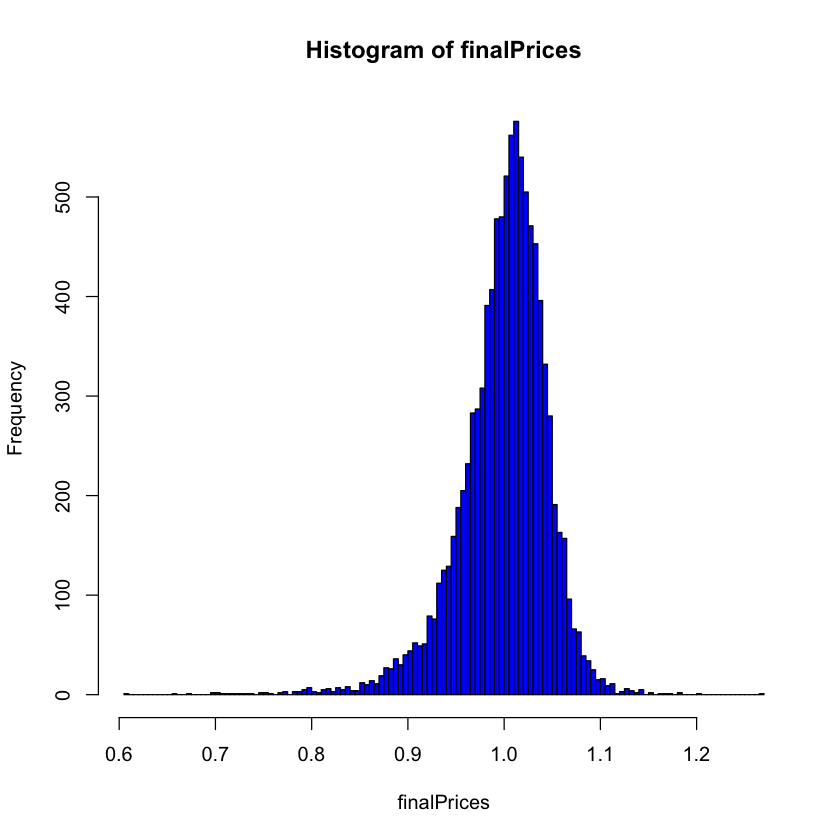

In [5]:
t0<-proc.time()
params <- list(S0=1, xi=0.235^2, eta=1.9, alpha=-0.43, rho=-0.9)
finalPrices <- hybridScheme(params)(N=1e4, n=100, kappa=1, T=0.041)
hist(finalPrices, col='blue', breaks=100)
summary(finalPrices)
proc.time()- t0

## 3. Numerical experiment and result

### 3.1 Option pricing under rough volatility

As the first experiment, we study Monte Carlo option pricing in the rough Bergomi (rBergomi) model of Bayer et al. (2015). In the rBergomi model, the logarithmic spot variance of the price of the underlying is modeled by a rough Gaussian process, which is a special case of (10.1). By virtue of the rough volatility process, the model fits well to observed implied volatility smiles (Bayer et al., 2015, pp. 15-9).

##### Parameters values used in the rBergomi model:

| $S_0$ | $\xi$ | $\eta$ | $\alpha$ | $\rho$ |
|:--------:|:-----:|:------:|:--------:|:------:|
| $1$ | $0.235^2$ | $1.9$ | $-0.43$ | $-0.9$ |

We map the option price $C(S(0),K,T)$ given in (2.13) to the corresponding Black-Scholes implied volatility $IV(S(0),K,T)$, see, e.g., Gatheral (2006). Reparameterizing the implied volatility using the log-strike $k := \log(\frac{K}{S_0})$ allows us to drop the dependence on the initial price, so we will abuse notation slightly and write $IV(k,T)$ for the corresponding implied volatility. Figure 4 displays implied volatility smiles obtained from the rBergomi model using the hybrid and Riemann-sum schemes to simulate Y , as discussed above, and compares these to the smiles obtained using an exact simulation of Y via Cholesky factorization. The parameter values are given in Table 1. They have been adopted from Bayer et al. (2015), who demonstrate that they result in realistic volatility smiles. We consider two different maturities: "small", $T = 0.041$, and "large", $T = 1$.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6343  0.9785  1.0070  1.0000  1.0300  1.2430 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7190  0.9810  1.0060  0.9999  1.0260  1.1590 

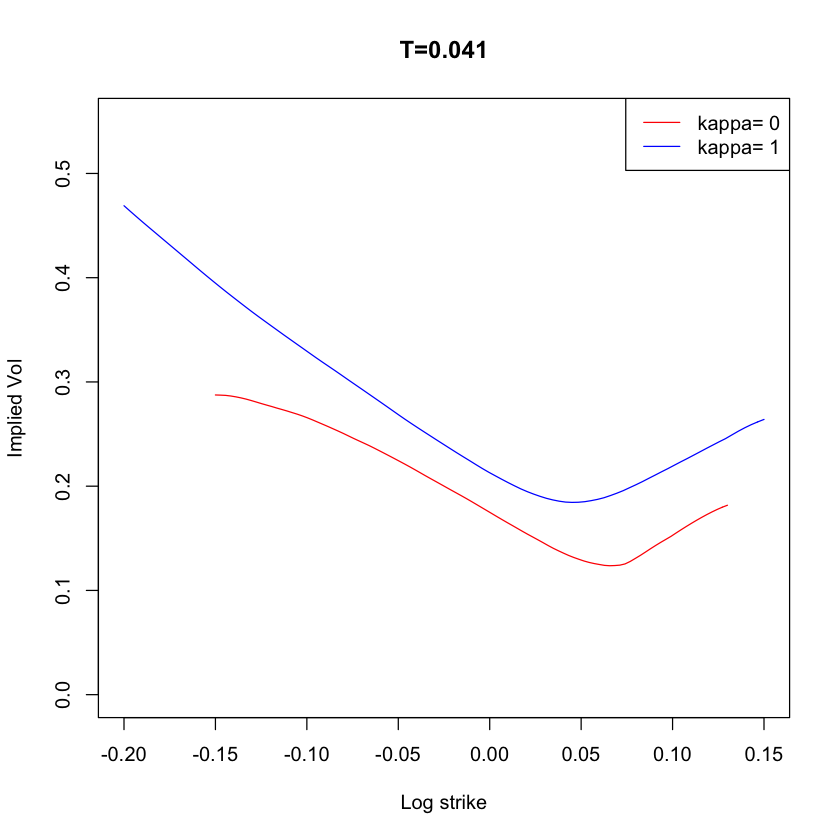

In [6]:

params <- list(S0=1, xi=0.235^2, eta=1.9, alpha=-0.43, rho=-0.9)
T <- 0.041
n <- 200 # step length is 1/n
paths <- 1e4
set.seed(9081)


finalPrices <- hybridScheme(params)(paths, n, 1, T) # kappa=1
summary(finalPrices)

finalPrices2<- hybridScheme(params)(paths, n, 0, T) # kappa=0
summary(finalPrices2)




curve(ImpliedVol(x, finalPrices, T), from=-0.2, to=0.15, col='blue',
      xlab="Log strike", ylab="Implied Vol", ylim= c(0, 0.55))
curve(ImpliedVol(x, finalPrices2, T),from=-0.15, to=0.13, add=TRUE, col='red')
legend('topright', legend= c('kappa= 0', 'kappa= 1'), col= c('red', 'blue'), lty=1)
title(main = 'T=0.041')





Figure1: Implied volatility smiles computed using Monte Carlo simulation (10000 replications), with maturity T = 0.041. The spot variance process v was simulated using an exact method, the hybrid scheme ($\kappa = 1$ and $\mathbf{b} = \mathbf{b}^*$) and Riemann-sum scheme ($\kappa = 0$ and $\mathbf{b} = \mathbf{b}^*$ ). The parameter values used in the rBergomi model are given in above Table.* 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02268 0.89470 1.03300 1.00100 1.14000 2.12100 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1759  0.9200  1.0310  0.9970  1.1090  1.3990 

   user  system elapsed 
 23.361   0.223  23.555 

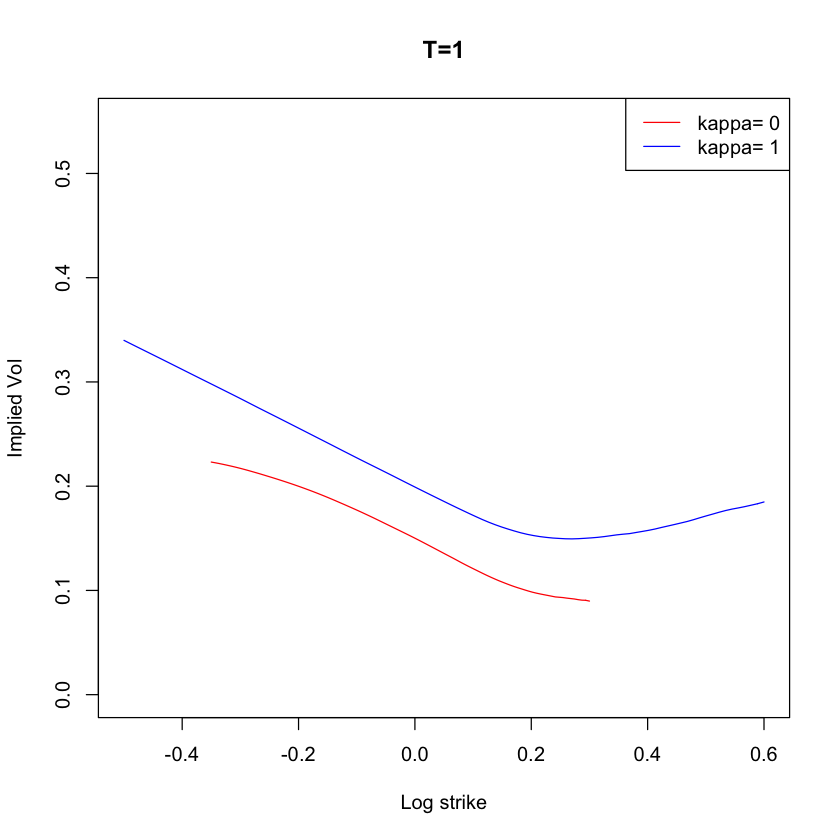

In [7]:
T<-1

set.seed(9081)
t0<- proc.time()

finalPrices3<- hybridScheme(params)(paths, n ,1, T) # kappa=1
summary(finalPrices3)
finalPrices4<- hybridScheme(params)(paths, n ,0, T) # kappa=0
summary(finalPrices4)

curve(ImpliedVol(x, finalPrices3,T), from=-0.5, to=0.6, col='blue',
      xlab="Log strike", ylab="Implied Vol", ylim= c(0, 0.55))
curve(ImpliedVol(x, finalPrices4,T),from=-0.35, to=0.3, add=TRUE, col='red')
legend('topright', legend= c('kappa= 0', 'kappa= 1'), col= c('red', 'blue'), lty=1)
title(main = 'T=1')

proc.time()-t0
# it takes about 20 seconds to run

Figure1: Implied volatility smiles computed using Monte Carlo simulation (10000 replications), with maturity T = 1. The spot variance process v was simulated using an exact method, the hybrid scheme ($\kappa = 1$ and $\mathbf{b} = \mathbf{b}^*$) and Riemann-sum scheme ($\kappa = 0$ and $\mathbf{b} = \mathbf{b}^*$ ). The parameter values used in the rBergomi model are given in above Table.* 

### 3.2 Sensitivity Analysis





#### 3.2.1 Sensitivity on $\xi$


In [8]:

params <- list(S0=1, xi=0.235^2, eta=1.9, alpha=-0.43, rho=-0.9)
T <- 0.041
n <- 100 # step length is 1/n
paths <- 1e4*5
set.seed(9081)

finalPrices <- hybridScheme(params)(paths, n, 1, T) 


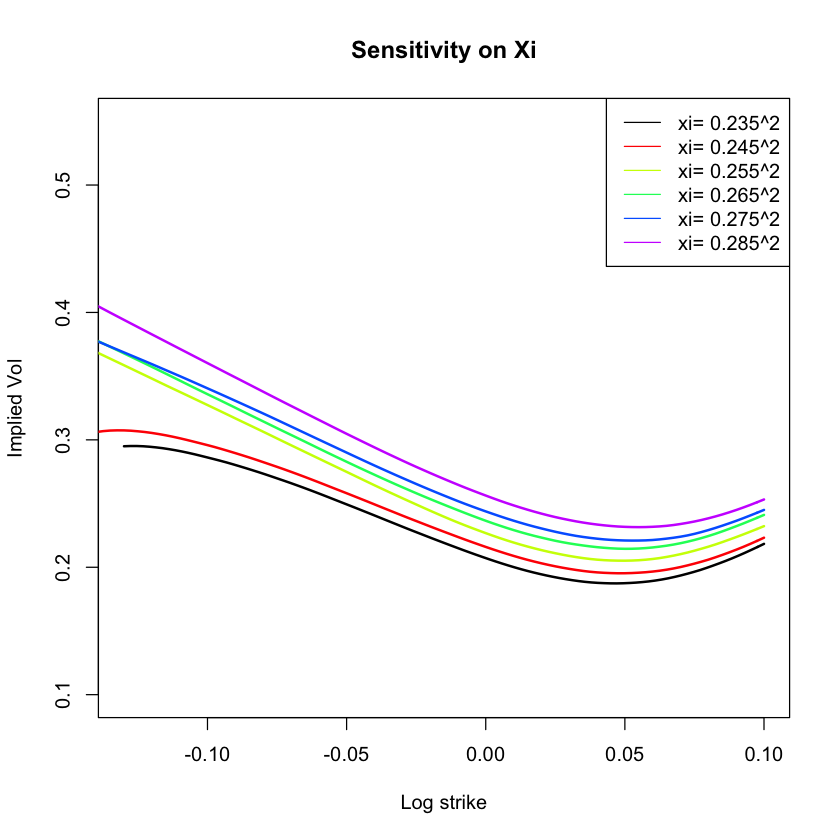

In [9]:
set.seed(9081)
k<-5
clr<- rainbow(k)
finalP<- list()


for (i in 1:k){
  
  param<- params
  param$xi<- (sqrt(param$xi)+0.01*i)^2
  #print(i)
  
  finalP[[i]]<- hybridScheme(param)(paths, n,1,T)
}
save(finalP, file='finalP_xi.rData')

curve(ImpliedVol(x, finalPrices,T), from=-0.13, to=0.1, col='black',
      xlab="Log strike", ylab="Implied Vol", ylim= c(0.1, 0.55) ,lwd=2)

for (i in 1:k){
  curve(ImpliedVol(x, finalP[[i]], T),from=-0.15, to=0.1, add=TRUE, col=clr[i], lwd=2)
}

legend( 'topright',
        legend=c ('xi= 0.235^2', 
                  'xi= 0.245^2',
                  'xi= 0.255^2',
                  'xi= 0.265^2',
                  'xi= 0.275^2',
                  'xi= 0.285^2'), 
        col = c('black', clr), lty=1)


title( 'Sensitivity on Xi')




#### 3.2.2 Sensitivity on $\alpha$


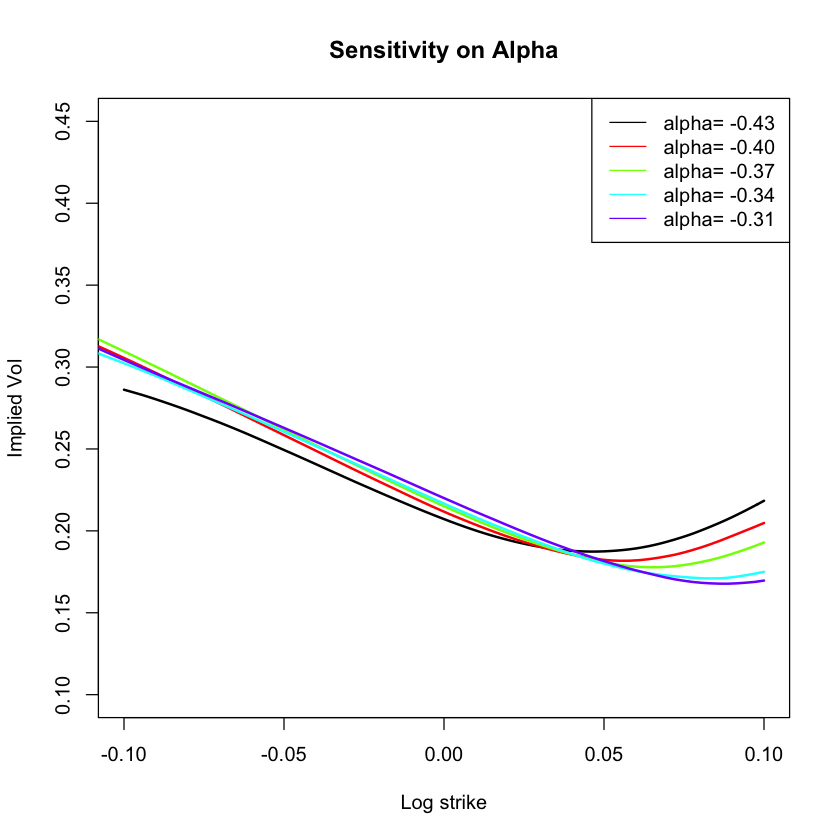

In [10]:

k<-4
clr<- rainbow(k)
finalP<- list()


for (i in 1:k){
  
  param<- params
  param$alpha<- param$alpha+0.03*i
  # print(i)
  
  finalP[[i]]<- hybridScheme(param)(paths, n,1,T)
}
save(finalP, file='finalP_alpha.rData')

curve(ImpliedVol(x, finalPrices,T), from=-0.1, to=0.1, col='black',
      xlab="Log strike", ylab="Implied Vol", ylim= c(0.1, 0.45) ,lwd=2)

for (i in 1:k){
  curve(ImpliedVol(x, finalP[[i]],T ),from=-0.18, to=0.1, add=TRUE, col=clr[i], lwd=2)
}

legend( 'topright',
        legend=c ('alpha= -0.43', 
                  'alpha= -0.40',
                  'alpha= -0.37',
                  'alpha= -0.34',
                  'alpha= -0.31'), 
        col = c('black', clr), lty=1)


title( 'Sensitivity on Alpha')


#### 3.2.3 Sensitivity on $\eta$



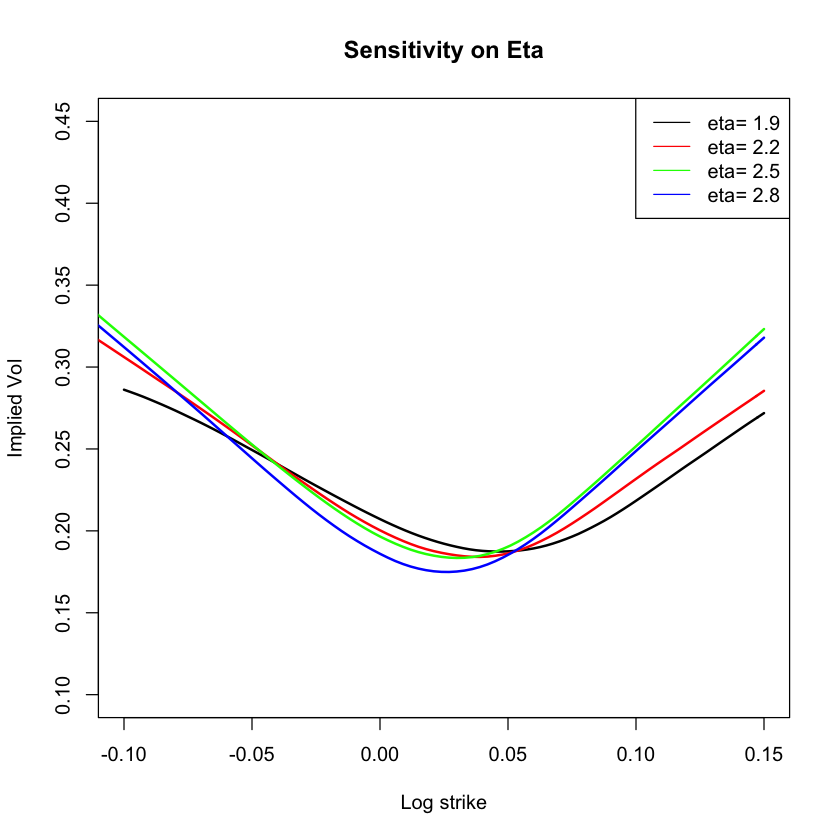

In [11]:


k<-3
clr<- rainbow(k)
finalP<- list()


for (i in 1:k){
  
  param<- params
  param$eta<- param$eta+0.3*i
  
  finalP[[i]]<- hybridScheme(param)(paths, n,1,T)
}
save(finalP, file='finalP_eta.rData')

curve(ImpliedVol(x, finalPrices,T), from=-0.1, to=0.15, col='black',
      xlab="Log strike", ylab="Implied Vol", ylim= c(0.1, 0.45) ,lwd=2)

for (i in 1:k){
  curve(ImpliedVol(x, finalP[[i]],T),from=-0.15, to=0.15, add=TRUE, col=clr[i], lwd=2)
}

legend( 'topright',
        legend=c ('eta= 1.9', 
                  'eta= 2.2',
                  'eta= 2.5',
                  'eta= 2.8'), 
        col = c('black', clr), lty=1)


title( 'Sensitivity on Eta')




#### 3.2.4 Sensitivity on $\rho$

When $\rho < 0$,


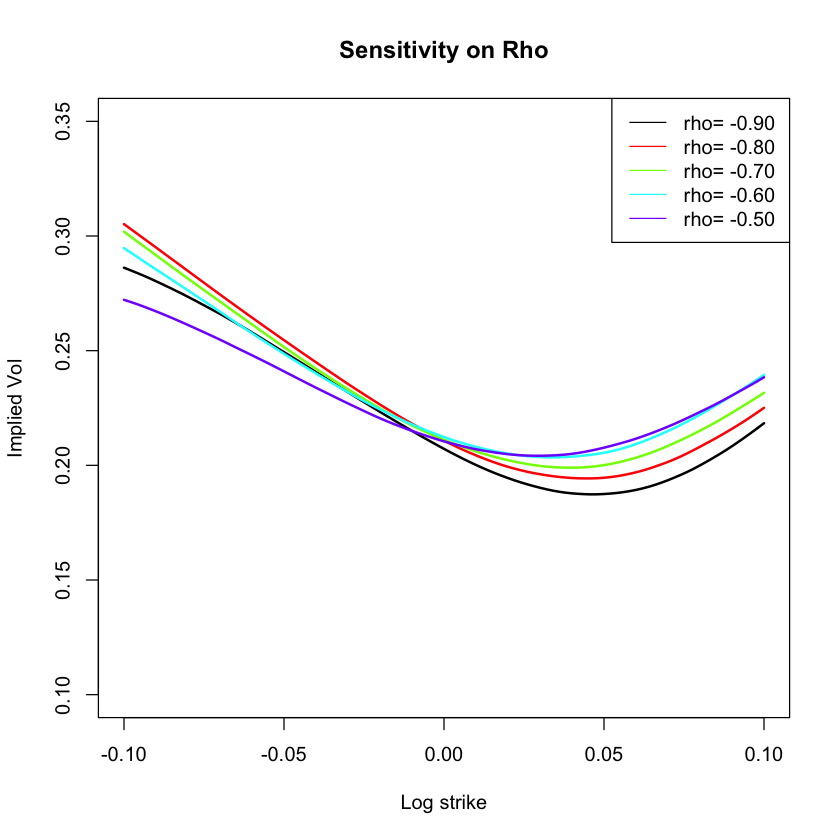

In [12]:


k<-4
clr<- rainbow(k)
finalP<- list()


for (i in 1:k){
  
  param<- params
  param$rho<- param$rho+0.1*i
  #print(i)
  
  finalP[[i]]<- hybridScheme(param)(paths, n,1,T)
}
  
save(finalP, file='finalP_rhoNegative.rData')

curve(ImpliedVol(x, finalPrices,T), from=-0.1, to=0.1, col='black',
      xlab="Log strike", ylab="Implied Vol", ylim= c(0.1, 0.35) ,lwd=2)

for (i in 1:k){
  curve(ImpliedVol(x, finalP[[i]],T),from=-0.1, to=0.1, add=TRUE, col=clr[i], lwd=2)
}



legend( 'topright',
        legend=c ('rho= -0.90', 
                  'rho= -0.80',
                  'rho= -0.70',
                  'rho= -0.60',
                  'rho= -0.50'), 
        col = c('black', clr), lty=1)



title( 'Sensitivity on Rho')


When $\rho > 0$,



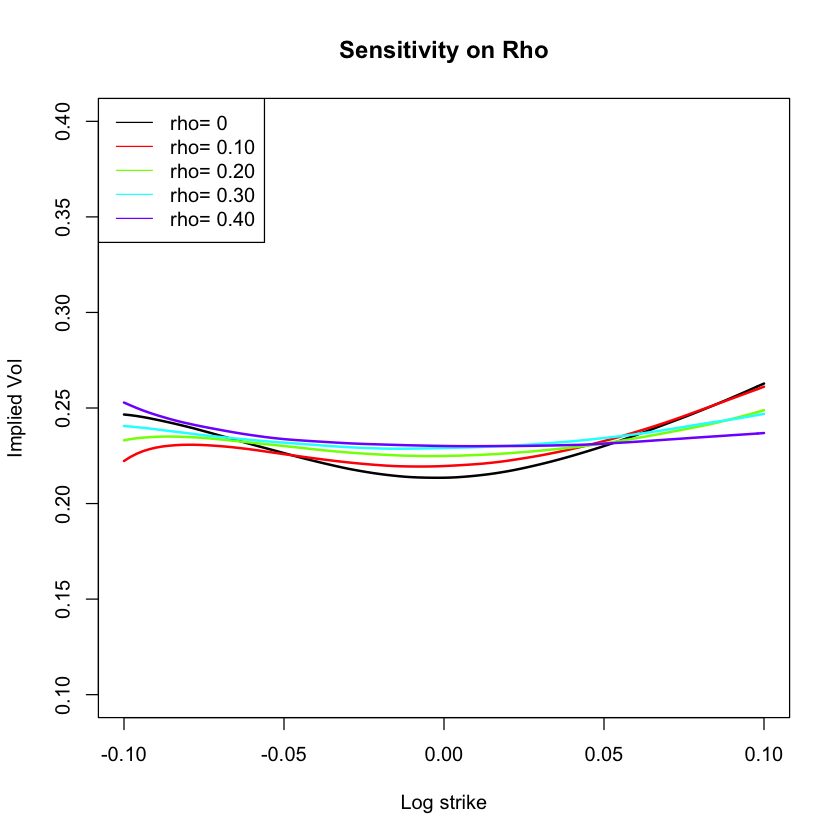

In [13]:
# paths<- 1e5


n<- 500

k<-4
clr<- rainbow(k)
finalP<- list()

params$rho<-0
finalPrices <- hybridScheme(params)(paths, n, 1, T)

for (i in 1:k){
 
 param<- params
 param$alpha<- param$alpha+0.1*i
 #print(i)

 finalP[[i]]<- hybridScheme(param)(paths, n,1,T)
}

save(finalP, file='finalP_rhoPositive.rData')

curve(ImpliedVol(x, finalPrices, T), from=-0.1, to=0.1, col='black',
      xlab="Log strike", ylab="Implied Vol", ylim= c(0.1, 0.4) , xlim= c(-0.1, 0.1),lwd=2)

for (i in 1:k) {
 curve(ImpliedVol(x, finalP[[i]], T),from=-0.1, to=0.1, add=TRUE, col=clr[i], lwd=2)
}

legend( 'topleft',
       legend=c ('rho= 0', 
                 'rho= 0.10',
                 'rho= 0.20',
                'rho= 0.30',
                 'rho= 0.40'), 
      col = c('black', clr), lty=1)
title( 'Sensitivity on Rho')

### 3.3 S&P 500 Volatility Surface Calibration

#### 3.3.1 Volatility Surface Generation

We construct volatility surface using SPX option data on Sep. 15, 2011.


In [62]:
rm(list=ls())

download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/BlackScholes.R.zip", destfile="BlackScholes.R.zip")
unzip(zipfile="BlackScholes.R.zip")
source("BlackScholes.R")


download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/MTH9875_4_rFiles.zip", destfile="rFiles4.zip")
unzip(zipfile="rFiles4.zip")

download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/spxOptionMetrics.rData_.zip", destfile="spxOptionMetrics.rData.zip")
unzip(zipfile="spxOptionMetrics.rData.zip")


load("spxOptionMetrics.rData")

library(stinepack)
source("BlackScholes.R")
source("optionMetricsToIvols.R")
source('computeImpliedVols.R')
source('plotIvols_svibss.R')

tail(spxData110915)

secid     date              symbol symbol_flag   exdate last_date
2562266 108105 20110915 SPXW 110923P1300000           1 20110923        NA
2562267 108105 20110915 SPXW 110923P1325000           1 20110923        NA
2562268 108105 20110915 SPXW 110923P1350000           1 20110923        NA
2562269 108105 20110915  SPXW 110923P925000           1 20110923        NA
2562270 108105 20110915  SPXW 110923P950000           1 20110923  20110915
2562271 108105 20110915  SPXW 110923P975000           1 20110923        NA
        cp_flag strike_price best_bid best_offer volume open_interest optionid
2562266       P      1300000    91.20      93.10      0             0 64618280
2562267       P      1325000   116.00     117.80      0             0 64618281
2562268       P      1350000   139.90     144.80      0             0 64619484
2562269       P       925000     0.00       0.10      0             0 64618813
2562270       P       950000     0.15       0.20   5877             0 64618239
2562271       P       975000     0.00       0.55      0             0 64618814
        cfadj ss_flag root suffix ticker index_flag             issuer
2562266     1       0                SPX          1 CBOE S&P 500 INDEX
2562267     1       0                SPX          1 CBOE S&P 500 INDEX
2562268     1       0                SPX          1 CBOE S&P 500 INDEX
2562269     1       0                SPX          1 CBOE S&P 500 INDEX
2562270     1       0                SPX          1 CBOE S&P 500 INDEX
2562271     1       0                SPX          1 CBOE S&P 500 INDEX
        div_convention exercise_style am_set_flag
2562266              I              E           1
2562267              I              E           1
2562268              I              E           1
2562269              I              E           1
2562270              I              E           1
2562271              I              E           1

In [63]:

spxData110915$strike_price <- spxData110915$strike_price/1000
spxOptData <- generateOptionMetricsIvols(spxData110915)

tail(spxOptData)

Expiry    Texp Strike       Bid       Ask     Fwd   CallMid
1171 20131221 2.26694   1800 0.1743369 0.1872762 1160.77 8.9094591
1172 20131221 2.26694   1900 0.1596432 0.1807033 1160.77 4.1003761
1173 20131221 2.26694   2000 0.1571705 0.1744750 1160.77 2.0501880
1174 20131221 2.26694   2250 0.1642799 0.1794126 1160.77 0.7340179
1175 20131221 2.26694   2500 0.1686202 0.1938433 1160.77 0.4049754
1176 20131221 2.26694   3000 0.1871068 0.2190625 1160.77 0.2024877

$expiries
 [1] 0.005475702 0.021902806 0.041067762 0.101300479 0.177960301 0.254620123
 [7] 0.290212183 0.503764545 0.539356605 0.752908966 0.788501027 1.270362765
[13] 1.768651608 2.266940452

$atmVol
 [1] 0.1801351 0.3082525 0.2946014 0.2820179 0.2978022 0.2873252 0.2853402
 [8] 0.2792849 0.2807139 0.2758373 0.2760718 0.2684932 0.2650282 0.2637186

$atmSkew
 [1] -1.8166969 -1.3546245 -1.1209457 -0.8177976 -0.7423413 -0.5658659
 [7] -0.5458074 -0.4114060 -0.4027825 -0.3536120 -0.3710598 -0.2963508
[13] -0.2561800 -0.2448122

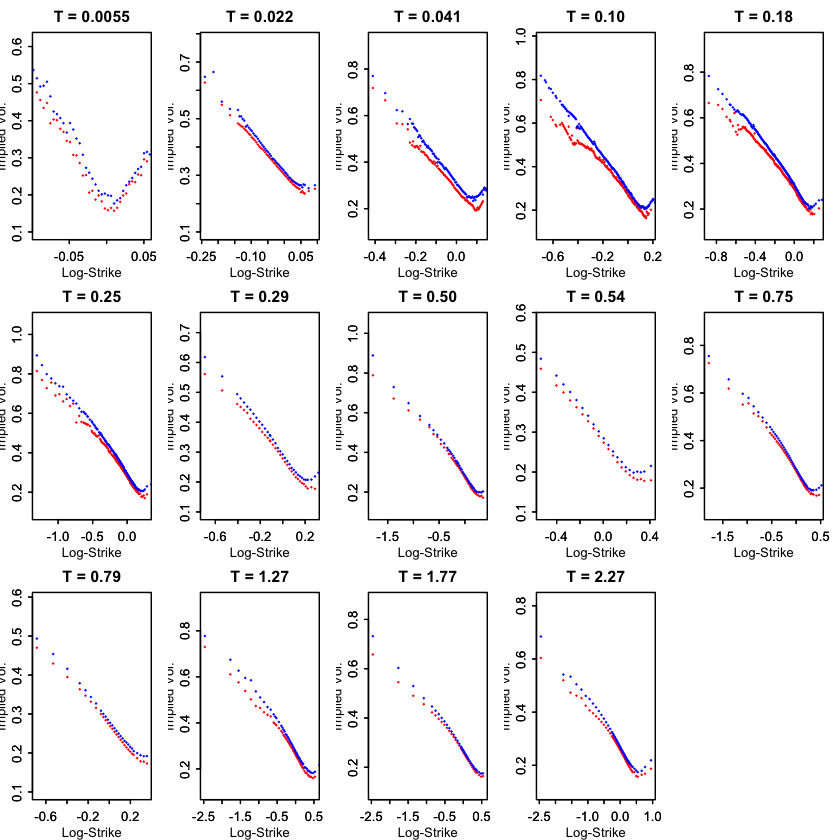

In [64]:
plotIvols_svibss(ivolData = spxOptData)

Figure. Implied volatility plot of option data set $\textit{spxData110915}$

#### 3.3.2 Calibration

Above figure shows implied vol plot of contracts with different expiration on Sep 15th, 2011. We observe that ATM implied vol are not equal. It stimulates us to calibrate BSS model slice by slice. 

First note that $\xi $ measures forward variance curve. It shows a level effect as we pictured above. Therefore ATM vol would be a good estimator for each slice. 

According to Gatheral, Jim, Thibault Jaisson, and Mathieu Rosenbaum. "Volatility is rough." Available at SSRN 2509457 (2014).

- Historical realized variance shows very stable $\alpha$.

- The Oxford-Man Institute of Quantitative Finance makes historical realized variance (RV) estimates freely available at http://realized.oxford-man.ox.ac.uk.
    - Using the Using Appendix C of <span>[Gatheral, Jaisson and Rosenbaum]<sup id="cite_ref-GJR" class="reference"><a href="#cite_note-GJR"><span>[</span>9<span>]</span></a></sup>, we estimate and rescale $\alpha$ from the Oxford-Man realized variance dataset, finding $\alpha \approx -0.45$


So we keep $\alpha$ unchanged and variate $\eta$ and $\rho$  slice by slice. We start with initial guess $\eta= 2$ and $\rho= -0.9$

In [80]:


source("sviFit0.R")
source("svi.R")
source('sviarbitrage.R')
source('sviRoots.R')
source('sviSqrtFit.R')
source("computeImpliedVols.R")
source("sviFitQuarticRoots.R")
source("sviVolSurface.R")
source('plotIvols_svibss.R')
source('hybrid_bss.R')
source('bssFit.R')
source('bssIv.R')

In [88]:
# Fit BSS independently to each slice

bssSqFit<- function (ivolData, paths=5e3, n=400 , kappa=1, kscale= .4,
                     guess=list(S0=1, eta=2 , xi=0.24^2, alpha=-0.44, rho=-.9 ) ,slices= NULL){
  bidVols <- as.numeric(ivolData$Bid)
  askVols <- as.numeric(ivolData$Ask)
  expDates <- unique(ivolData$Texp)
  nSlices <- length(expDates)
  if (!is.null(slices)) {
    nSlices <- length(slices)
  }
  else {
    slices <- 1:nSlices
  }
  colnum <- sqrt(nSlices * 2)
  rows <- round(colnum/2, 0)
  columns <- round(colnum, 0)
  while (rows * columns < nSlices) {
    rows <- rows + 1
  }
  atmVol <- numeric(nSlices)
  atmSkew <- numeric(nSlices)
  
  S0<- rep(1, nSlices)
  alpha<- numeric(nSlices)
  eta<-   numeric(nSlices)
  rho<-   numeric(nSlices)
  xi<-    numeric(nSlices)
  
  TEXP<- expDates[slices]
  alpha1<- numeric(nSlices)
  eta1<-   numeric(nSlices)
  rho1<-   numeric(nSlices)
  xi1<-    numeric(nSlices)

  i<-1 
  
  for (slice in slices) {
    t <- expDates[slice]
    texp <- ivolData$Texp
    bidVol <- bidVols[texp == t]
    askVol <- askVols[texp == t]
    midVol <- (bidVol + askVol)/2
    f <- (ivolData$Fwd[texp == t])[1]
    k <- log(ivolData$Strike[texp == t]/f)
    include <- !is.na(bidVol)
    kmin <- min(k[include])
    kmax <- max(k[include])

    kIn <- k[!is.na(midVol)]
    volIn <- midVol[!is.na(midVol)]
    volInterp <- function(xout) {
      stinterp(x = kIn, y = volIn, xout)$y
    }
    atmVol[i] <- volInterp(0)
    N<-n;
    if (t<0.1) { N<- max(N,400)}
    
    xi_obj<- function (param_xi, param, k_in, midVol_in){
      param$xi<-param_xi
      bssVol<- bssiv(bssparams = param, paths = paths, n = N, kappa = kappa, k = k_in, t = t )
      res<- sum((bssVol- midVol_in)^2) *1e4
      
      return (res)
    }
    
    eta_obj<- function (param_eta, param, k_in, midVol_in){
      param$eta<- param_eta
      bssVol<- bssiv(bssparams = param, paths = paths, n = N, kappa = kappa, k = k_in, t = t )
      res<- sum((bssVol- midVol_in)^2) *1e4
      
      return (res)
    }
    
    rho_obj<-function(param_rho, param, k_in, midVol_in){
      param$rho<- param_rho
      bssVol<- bssiv(bssparams = param, paths = paths, n = N, kappa = kappa, k = k_in, t = t )
      res<- sum((bssVol- midVol_in)^2) *1e4
      
      return (res)
    }
    
    bssparam<- guess
    
    k_low<- kmin*kscale
    k_high<- kmax*kscale
    idx<- which(kIn> k_low & kIn<k_high)
    midVol_in<- volIn[idx]
    k_in<- kIn[idx]
    
    ## First, optimize xi
    set.seed(9081)
    lower<-(atmVol[i]-0.1)^2
    upper<- (atmVol[i]+0.1)^2
    fit_xi<- optimize(f = xi_obj, param= bssparam, k_in= k_in, midVol_in= midVol_in, 
                      lower = lower, upper = upper, maximum = F)
    if(fit_xi$minimum<= lower + 0.0001 || fit_xi$minimum >= upper-0.0001){
      message("Warning! The boundary of Xi is hit.")
    }
    bssparam$xi<- fit_xi$minimum
    fit_xi$param<- bssparam
    
    ## Second, optimize eta, with optimized xi
    set.seed(9081)
    lower<- 1.6
    upper<- 2.8
    fit_eta<- optimize(f = eta_obj, param= bssparam,k_in=k_in, midVol_in=midVol_in, 
                       lower = lower, upper = upper, maximum = F)
    if(fit_eta$minimum<=lower+0.0001 || fit_eta$minimum >= upper-0.0001){
      message('Warning! The boundary of Eta is hit.')
    }
    bssparam$eta<- fit_eta$minimum
    fit_eta$param<- bssparam
    
    ## Last, optimize rho, with optimized xi and eta
    set.seed(9081)
    lower<- -0.99
    upper<--.5
    
    fit_rho<- optimize(f= rho_obj, param= bssparam, k_in= k_in, midVol_in=midVol_in, 
                       lower = lower, upper= upper, maximum = F)
    if(fit_rho$minimum< lower+0.0001 || fit_rho$minimum > upper-0.0001){
      message('Warning! The boundary of Rho is hit.')
    }
    bssparam$rho<- fit_rho$minimum
    fit_rho$param<- bssparam
    
#     if (!(fit_xi$objective>= fit_eta$objective/3 && fit_eta$objective>= fit_rho$objective/3)){
#       message ('The optimization kernal shows suspicious contradicts with t= ', t)
#     }
    
    alpha[i]<- bssparam$alpha
    rho[i]  <- bssparam$rho
    eta[i]  <- bssparam$eta
    xi[i]   <- bssparam$xi
    
    bestfit<- fit_xi
    if (fit_eta$object< bestfit$object) {bestfit<- fit_eta}
    if (fit_rho$object< bestfit$object) {bestfit<- fit_rho}
    
    alpha1[i]<- bestfit$param$alpha
    rho1[i]<-   bestfit$param$rho
    eta1[i]<-   bestfit$param$eta
    xi1[i]<-    bestfit$param$xi
    
    i<- i+1
  }

  res<- list(normal= data.frame(texp= TEXP, S0=S0, xi= xi, alpha= alpha, eta= eta, rho=rho),
             best= data.frame(texp= TEXP, S0= S0, xi= xi1, alpha= alpha1, eta= eta1, rho=rho1))
  return (res)
  
}
set.seed(9081)

In [89]:
### Calibrate the slice with T =0.0055

bssparam<- bssSqFit(ivolData = spxOptData, paths = 1e3, n = 200, slices = 1)

print(bssparam$best)

         texp S0         xi alpha      eta        rho
1 0.005475702  1 0.04677971 -0.44 2.193711 -0.7072408


$expiries
 [1] 0.005475702 0.021902806 0.041067762 0.101300479 0.177960301 0.254620123
 [7] 0.290212183 0.503764545 0.539356605 0.752908966 0.788501027 1.270362765
[13] 1.768651608 2.266940452

$atmVol
[1] 0.1801351

$atmSkew
[1] -1.816697

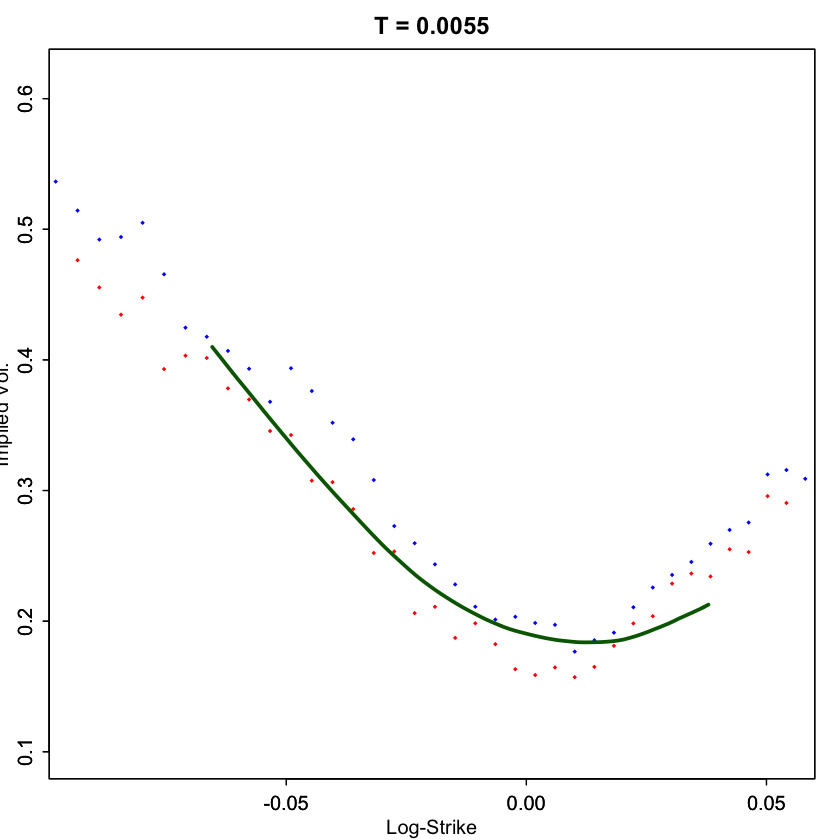

In [90]:
plotIvols_svibss(spxOptData, paths=1e4, n=200, bssMatrix = bssparam$best, slices = 1, bssplotscale = .7)

The estimated BSS parameters for the full sets. 


In [92]:
load('spx20110915bss.rData')

bssmatrix$best

texp S0         xi alpha      eta        rho
1  0.005475702  1 0.04647595 -0.44 2.293990 -0.9000000
2  0.021902806  1 0.13488085 -0.44 2.000000 -0.9000000
3  0.041067762  1 0.10689509 -0.44 2.000000 -0.9000000
4  0.101300479  1 0.11424598 -0.44 1.832014 -0.9000000
5  0.177960301  1 0.12964185 -0.44 2.450388 -0.6925452
6  0.254620123  1 0.11447381 -0.44 2.000000 -0.9000000
7  0.290212183  1 0.10489096 -0.44 2.230883 -0.9000000
8  0.503764545  1 0.10145195 -0.44 2.332307 -0.9000000
9  0.539356605  1 0.10455501 -0.44 1.856577 -0.9295617
10 0.752908966  1 0.09915015 -0.44 1.883241 -0.9000000
11 0.788501027  1 0.10682543 -0.44 2.000000 -0.9000000
12 1.270362765  1 0.09523411 -0.44 2.054195 -0.8068207
13 1.768651608  1 0.11148220 -0.44 2.000000 -0.9000000
14 2.266940452  1 0.07943895 -0.44 2.058359 -0.9000000

The fitting for full set



<h3><img src="bssplot_fullsize3.png" align = "left" width=1000></h3> 

### References  

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

#### example 



<li id="cite_note-ABDE"><span class="mw-cite-backlink"><b><a href="#cite_ref-ABDE">^</a></b></span>
Torben G Andersen, Tim Bollerslev, Francis X Diebold, and Heiko Ebens, The distribution of realized stock return volatility, *Journal of Financial Economics* **61**(1) 43-76 (2001).
</li>